In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.wkt import loads
from shapely.geometry import Point, Polygon
from osgeo import gdal, ogr

from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
SUBSET_ANTHROMES = False     # whether or not to use a spatial subset of the Anthromes data for testing purposes

if (SUBSET_ANTHROMES):

    anthromes_geom_gdf = gpd.read_file("NACIS-2022/anthromes-clip.gpkg")

    # make bounding box as geodataframe
    # below follows after https://gis.stackexchange.com/a/266765

    anthromes_bounds = anthromes_geom_gdf.geometry.total_bounds  #"a tuple containing minx, miny, maxx, maxy"

    p1 = Point(anthromes_bounds[0], anthromes_bounds[3])
    p2 = Point(anthromes_bounds[2], anthromes_bounds[3])
    p3 = Point(anthromes_bounds[2], anthromes_bounds[1])
    p4 = Point(anthromes_bounds[0], anthromes_bounds[1])

    np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
    np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
    np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
    np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

    bb_polygon = Polygon([np1, np2, np3, np4])

    world_boundaries_gdf = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])
    world_boundaries_gdf.crs = anthromes_geom_gdf.crs

    # densify the results
    # (results are equivalent to the world_boundaries_gdf, which was prepared ahead of time and stored in a file for the full dataset)
    # code here draws upon https://gis.stackexchange.com/q/432939
    from shapely.wkt import loads

    def segmentize(geom):
        wkt = geom.wkt  # shapely Polygon to wkt
        geom = ogr.CreateGeometryFromWkt(wkt)  # create ogr geometry
        geom.Segmentize(40000)  # densify geometry.. points every this so long.
        wkt2 = geom.ExportToWkt()  # ogr geometry to wkt
        new = loads(wkt2)  # wkt to shapely Polygon
        return new

    world_boundaries_gdf['geometry'] = world_boundaries_gdf['geometry'].apply(segmentize)
    world_boundaries_gdf

else:
    world_boundaries_gdf = gpd.read_file("NACIS-2022/wgs84-densified-world-extent.gpkg")

    # anthromes_geom_gdf = gpd.read_file("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_inputs.shp")
    anthromes_geom_gdf = gpd.read_file("C:/data/Anthromes-12k-DGG/an12_dgg_inputs.shp")

    #anthromes_attrib_df = pd.read_csv("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_baseline.csv")
    anthromes_attrib_df = pd.read_csv("C:/data/Anthromes-12k-DGG/an12_dgg_baseline.csv")



In [3]:
if (SUBSET_ANTHROMES):
    anthromes_gdf = anthromes_geom_gdf.drop(columns=['dissolved_id']) # subsetted file already has data merged and dissolved
else: 
    anthromes_gdf = anthromes_geom_gdf.merge(anthromes_attrib_df,how='left',on='id')

anthromes_gdf

,id,land_ar,pot_veg,pot_vll,regn_nm,geometry,10000BC,9000BC,8000BC,7000BC,...,2008AD,2009AD,2010AD,2011AD,2012AD,2013AD,2014AD,2015AD,2016AD,2017AD
0,1,0.035996,4.0,1.0,Europe,"POLYGON ((11.15386 58.26606, 11.19049 58.32552...",61,61,61,61,...,12,12,12,12,12,12,12,12,12,12
1,60,0.070934,13.0,0.0,North America,"POLYGON ((-168.68220 63.18021, -168.61456 63.1...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2,61,16.432507,13.0,0.0,North America,"POLYGON ((-168.68202 63.26480, -168.61421 63.2...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
3,62,43.679928,13.0,0.0,North America,"POLYGON ((-168.68185 63.34943, -168.61386 63.3...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
4,481,0.892202,15.0,1.0,Europe,"POLYGON ((11.08554 79.76483, 10.91970 79.80860...",63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429019,5204374,63.676296,15.0,0.0,Oceania,"POLYGON ((-176.35115 -44.00310, -176.35725 -44...",63,63,63,63,...,62,62,62,62,62,54,54,54,54,54
1429020,5205104,5.190774,15.0,0.0,Oceania,"POLYGON ((-176.21160 -43.99708, -176.21758 -44...",63,63,63,63,...,43,43,43,43,43,42,42,42,42,42
1429021,5206561,22.751982,15.0,0.0,Oceania,"POLYGON ((-176.16856 -44.22711, -176.17454 -44...",63,63,63,63,...,43,43,43,43,43,43,43,43,43,43
1429022,5207290,22.845491,15.0,0.0,Oceania,"POLYGON ((-176.10739 -44.30165, -176.11334 -44...",63,63,63,63,...,43,43,43,43,43,43,43,43,43,43


In [4]:
if (SUBSET_ANTHROMES):
    anthromes_dissolved_gdf = anthromes_gdf # subsetted file already has data merged and dissolved
else:
    anthromes_dissolved_gdf = anthromes_gdf[['geometry','1800AD','1900AD','2017AD']].dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)

anthromes_gdf['1800AD'] = anthromes_gdf['1800AD'].apply(str)
anthromes_gdf['1900AD'] = anthromes_gdf['1900AD'].apply(str)
anthromes_gdf['2017AD'] = anthromes_gdf['2017AD'].apply(str)

In [5]:
anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(0.000001, resolution=1, join_style=2)
anthromes_dissolved_gdf = anthromes_dissolved_gdf.dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)
anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(-0.000001,resolution=1, join_style=2)
anthromes_dissolved_gdf.to_crs(epsg=8857).is_valid.all()

C:\Users\Luke\AppData\Local\Temp\ipykernel_19724\515143912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(0.000001, resolution=1, join_style=2)
C:\Users\Luke\AppData\Local\Temp\ipykernel_19724\515143912.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(-0.000001,resolution=1, join_style=2)


True

In [6]:
anthromes_dissolved_gdf.to_crs(epsg=8857).is_valid.all()

True

In [7]:
anthromes_dissolved_gdf

,1800AD,1900AD,2017AD,geometry
0,11,11,11,"MULTIPOLYGON (((127.00886 37.48245, 126.94472 ..."
1,11,23,11,"POLYGON ((-6.05280 53.27866, -6.12579 53.25089..."
2,12,11,11,"MULTIPOLYGON (((135.38728 34.64653, 135.34559 ..."
3,12,12,11,"MULTIPOLYGON (((141.24057 43.16577, 141.31332 ..."
4,12,12,12,"MULTIPOLYGON (((152.54000 -3.07047, 152.59243 ..."
...,...,...,...,...
1369,63,63,42,"POLYGON ((42.82701 13.79883, 42.81132 13.74920..."
1370,63,63,43,"MULTIPOLYGON (((136.34866 -11.58015, 136.38002..."
1371,63,63,54,"MULTIPOLYGON (((173.73492 69.91981, 173.56406 ..."
1372,63,63,62,"MULTIPOLYGON (((87.40012 36.29436, 87.40764 36..."


In [8]:
anthromes_land_regions_gdf = anthromes_dissolved_gdf.dissolve()

In [9]:
# this is expected to be False--it's why we repair below.
anthromes_land_regions_gdf.to_crs(epsg=8857).is_valid.all()

False

In [10]:
anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(0.000001, resolution=1, join_style=2)
anthromes_land_regions_gdf = anthromes_land_regions_gdf.dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)
anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(-0.000001,resolution=1, join_style=2)
anthromes_land_regions_gdf.to_crs(epsg=8857).is_valid.all()

C:\Users\Luke\AppData\Local\Temp\ipykernel_19724\550913118.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(0.000001, resolution=1, join_style=2)
C:\Users\Luke\AppData\Local\Temp\ipykernel_19724\550913118.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(-0.000001,resolution=1, join_style=2)


True

In [11]:
world_boundaries_gdf['1800AD'] = '0'
world_boundaries_gdf['1900AD'] = '0'
world_boundaries_gdf['2017AD'] = '0'
world_boundaries_gdf


,geometry,1800AD,1900AD,2017AD
0,"MULTIPOLYGON (((-180.00000 -90.00000, -180.000...",0,0,0


,geometry,1800AD,1900AD,2017AD
0,"MULTIPOLYGON (((-180.00000 -89.75001, -180.000...",0,0,0


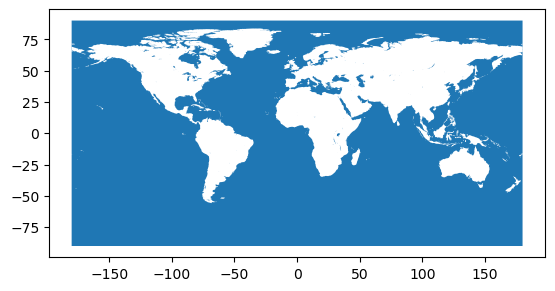

In [12]:
oceans_without_anthromes_gdf = gpd.overlay(world_boundaries_gdf,anthromes_land_regions_gdf,how='difference')
oceans_without_anthromes_gdf.plot()
oceans_without_anthromes_gdf

In [13]:
oceans_without_anthromes_gdf.to_crs(epsg=8857).is_valid.all()

True

C:\Users\Luke\AppData\Local\Temp\ipykernel_19724\1487963507.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dissolved_anthromes_with_oceans_gdf = anthromes_dissolved_gdf.append(oceans_without_anthromes_gdf).to_crs(epsg=8857)


<AxesSubplot:>

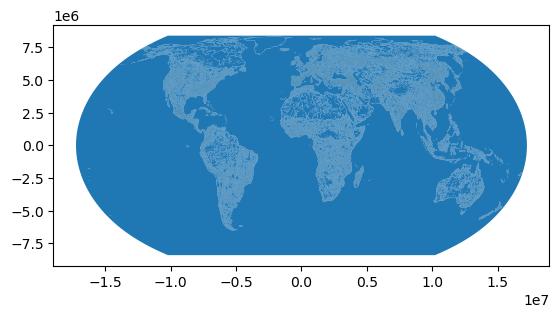

In [14]:
dissolved_anthromes_with_oceans_gdf = anthromes_dissolved_gdf.append(oceans_without_anthromes_gdf).to_crs(epsg=8857)
dissolved_anthromes_with_oceans_gdf.plot()

In [15]:
dissolved_anthromes_with_oceans_gdf.to_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf = gpd.read_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf.index.name = 'dissolved_id'
dissolved_anthromes_with_oceans_gdf.to_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [16]:
dissolved_anthromes_with_oceans_gdf = gpd.read_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf.sindex
dissolved_anthromes_with_oceans_gdf = dissolved_anthromes_with_oceans_gdf.explode(index_parts = False, ignore_index = True)
dissolved_anthromes_with_oceans_gdf.sindex
dissolved_anthromes_with_oceans_gdf

,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"POLYGON ((10956991.270 4637292.644, 10951661.5..."
1,0,11,11,11,"POLYGON ((10822422.616 3911051.716, 10817483.1..."
2,0,11,11,11,"POLYGON ((10756947.432 3908140.236, 10751913.3..."
3,0,11,11,11,"POLYGON ((10707214.123 3938881.227, 10702275.5..."
4,0,11,11,11,"POLYGON ((10543105.144 4021090.177, 10548047.0..."
...,...,...,...,...,...
256573,1374,0,0,0,"POLYGON ((-10846850.509 7446007.561, -10836432..."
256574,1374,0,0,0,"POLYGON ((-12070264.690 6558267.829, -12080887..."
256575,1374,0,0,0,"POLYGON ((-10917886.642 7432852.626, -10918752..."
256576,1374,0,0,0,"POLYGON ((-10877585.147 7477808.463, -10888053..."


In [17]:
dissolved_anthromes_with_oceans_gdf.dissolved_id = dissolved_anthromes_with_oceans_gdf.index
dissolved_anthromes_with_oceans_gdf

,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"POLYGON ((10956991.270 4637292.644, 10951661.5..."
1,1,11,11,11,"POLYGON ((10822422.616 3911051.716, 10817483.1..."
2,2,11,11,11,"POLYGON ((10756947.432 3908140.236, 10751913.3..."
3,3,11,11,11,"POLYGON ((10707214.123 3938881.227, 10702275.5..."
4,4,11,11,11,"POLYGON ((10543105.144 4021090.177, 10548047.0..."
...,...,...,...,...,...
256573,256573,0,0,0,"POLYGON ((-10846850.509 7446007.561, -10836432..."
256574,256574,0,0,0,"POLYGON ((-12070264.690 6558267.829, -12080887..."
256575,256575,0,0,0,"POLYGON ((-10917886.642 7432852.626, -10918752..."
256576,256576,0,0,0,"POLYGON ((-10877585.147 7477808.463, -10888053..."


In [18]:
dissolved_anthromes_with_oceans_gdf.geometry.is_valid.all()

True

In [19]:
dissolved_anthromes_with_oceans_gdf.has_sindex

True

In [20]:
unit = TileUnit(
    #tiling_type = "hex-colouring", 
    tiling_type = "hex-dissection", n = 3, dissection_offset = 0,
    #  Note these alternatives:
    #  tiling_type = "hex-dissection", 
    #  tiling_type = "hex-dissection", dissection_offset = 0,
    #     n = 3, 
    crs = dissolved_anthromes_with_oceans_gdf.crs, 
    spacing = 100000).transform_rotate(15)


id_var is no longer required and will be deprecated soon. A temporary unique index attribute is added and removed when generating the tiled map.


c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
unit.plot(show_ids = "id")

In [ ]:
unit.plot()
pyplot.savefig("NACIS-2022/hex-unitplot.pdf")

In [ ]:
unit.plot(r=2)
pyplot.savefig("NACIS-2022/hex-unitplot-r2.pdf")

In [ ]:
FILE_PREFIX = 'anthromes-hex-dissection--100km--margin-12km-across--ragged--prioritise-tiles'

tiling = Tiling(unit, dissolved_anthromes_with_oceans_gdf, id_var = "dissolved_id", tile_margin = 6000)

tiling.tiles.to_file('NACIS-2022/'+FILE_PREFIX+'--TILING_ONLY.gpkg')

In [21]:
# tiling.region.buffer(tiling.tile_unit.spacing).unary_union

In [22]:
map = tiling.get_tiled_map(ragged_edges=True,prioritise_tiles=True, tiles_or_elements = "tiles")
map.to_file('NACIS-2022/'+'anthromes-hex-dissection--100km--margin-12km-across--ragged--prioritise-tiles+'.gpkg')

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [23]:
map

TiledMap(tiling=Tiling(tile_unit=TileUnit(elements=  element_id                                           geometry
0          a  POLYGON ((35925.850 -35925.850, -0.000 0.000, ...
1          b  POLYGON ((-35925.850 35925.850, 13149.774 4907...
2          c  POLYGON ((-13149.774 -49075.623, -49075.623 -1..., tile=                                            geometry
0  POLYGON ((40824.829 -40824.829, 55767.754 1494..., spacing=100000, tile_shape=<TileShape.HEXAGON: 'hexagon'>, vectors=[(-25881.904510252076, 96592.58262890684), (-96592.58262890682, 25881.904510252083), (-70710.67811865476, -70710.67811865475), (25881.904510252032, -96592.58262890684), (96592.58262890684, -25881.904510252083), (70710.67811865479, 70710.67811865475)], regularised_tile=                                            geometry
0  POLYGON ((40824.829 -40824.829, 55767.754 1494..., crs=<Derived Projected CRS: EPSG:8857>
Name: WGS 84 / Equal Earth Greenwich
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]:

In [24]:
this will cause an error

SyntaxError: invalid syntax (2309815648.py, line 1)

In [25]:
import pickle
pickle.dump( map, open( "NACIS-2022/anthromes-nacis-hex-dissection--100km--margin-12km-across--ragged--prioritise-tiles-POSTER-V1--map-pickled.p", "wb" ) )

In [ ]:
import pickle
map = pickle.load( open( "NACIS-2022/anthromes-nacis-hex-dissection--100km--margin-12km-across--ragged--prioritise-tiles-POSTER-V1--map-pickled.p", "rb" ) )

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 12
  Warn("Warning: setting k to %d" % k_q, UserWarning)
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 13
  Warn("Warning: setting k to %d" % k_q, UserWarning)
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:241: 

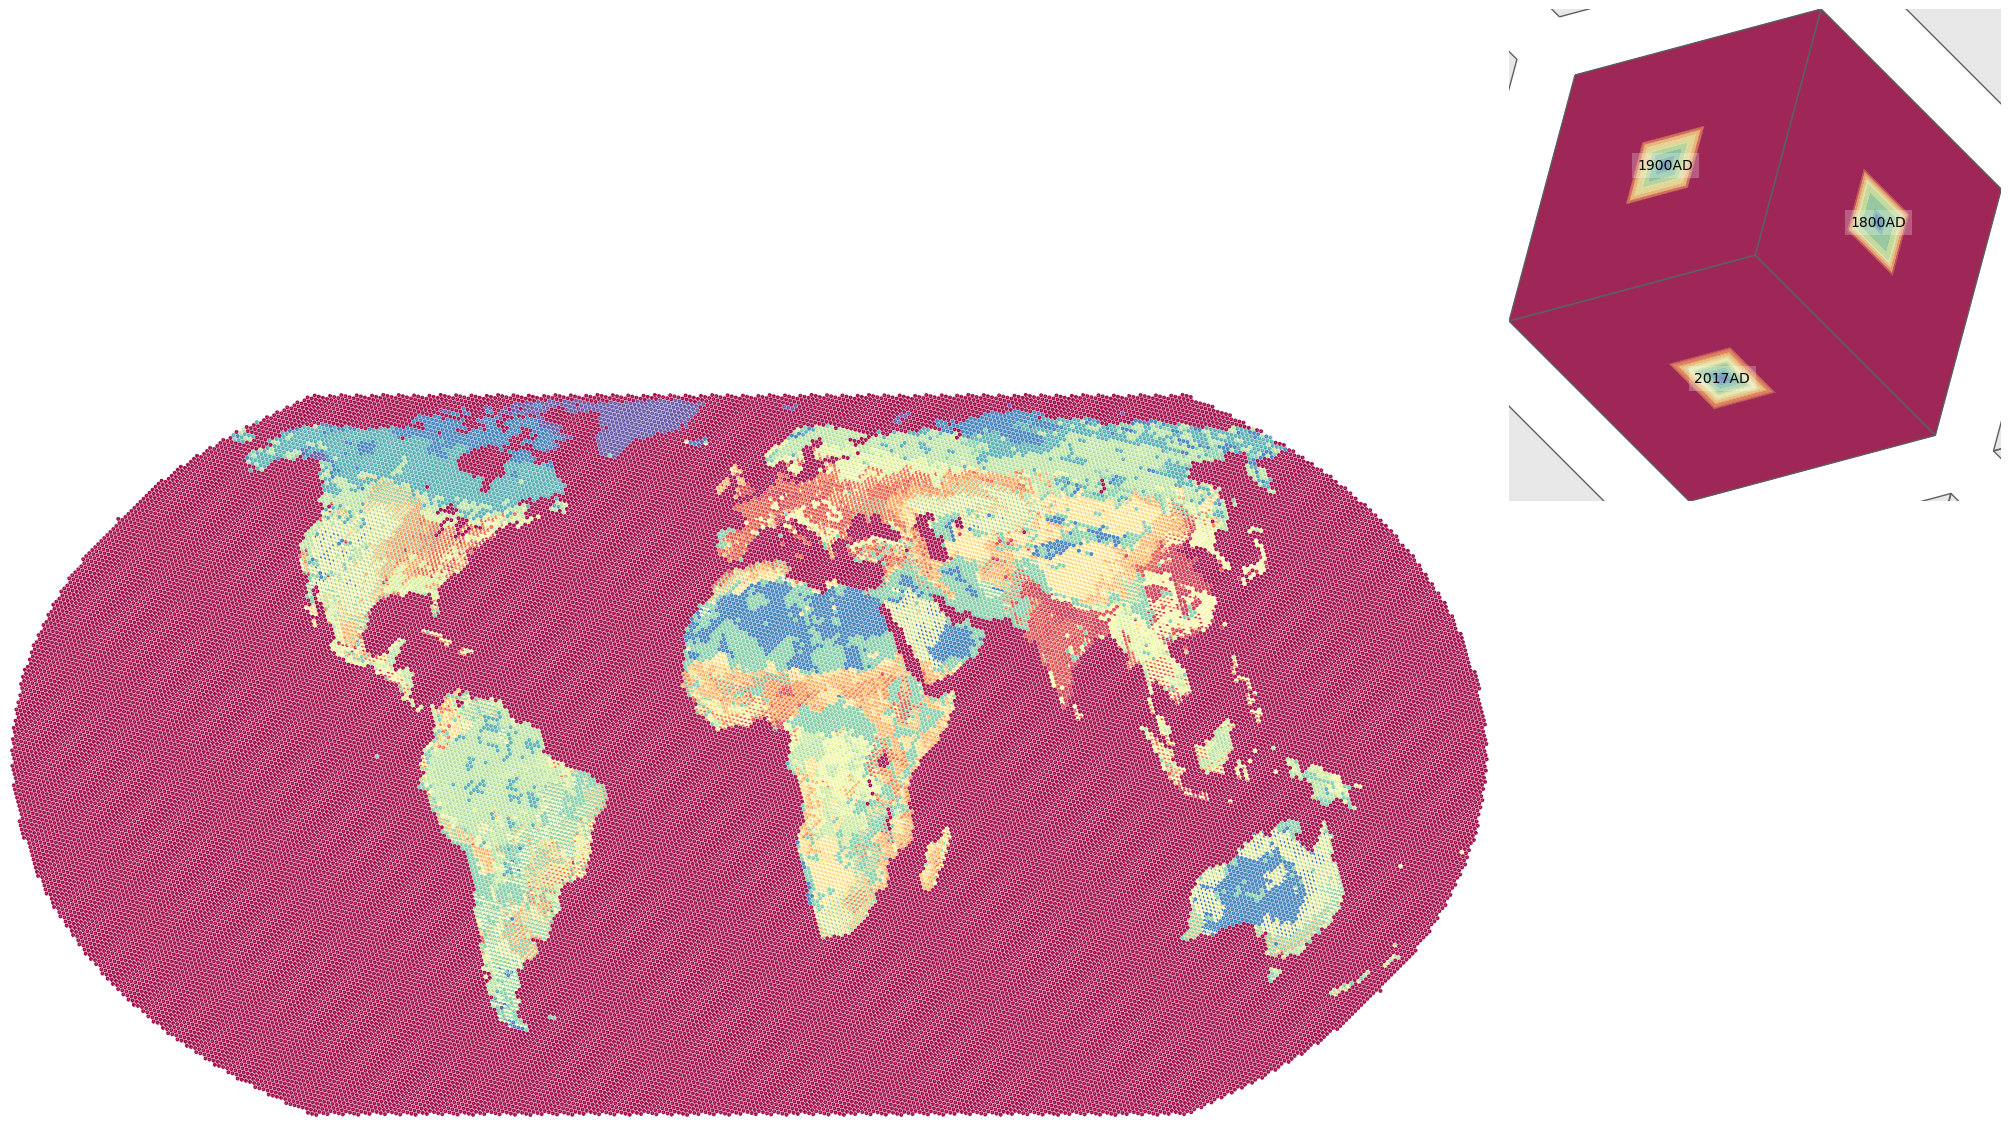

In [26]:
map.variables = dict(zip(list("abc"),
                        ("1800AD", "1900AD", "2017AD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

#map.dpi = 600  # don't ask me what makes sense for DPI
#map.figsize = (10, 7)

fig = map.render(legend = True, scheme = "quantiles") # quantiles for interest

fig.savefig("NACIS-2022/anthromes-nacis-hex-dissection--100km--margin-12km-across--ragged--prioritise-tiles-POSTER-V1--LEGEND.pdf")